In [118]:
import pandas as pd

In [119]:
att = pd.read_csv("C:/Users/WENCESLAO/Desktop/Data Science Project/2.PROJECT HR ANALYTICS/Dataset/Emp_Attrition.csv")


In [120]:
demo = pd.read_csv("C:/Users/WENCESLAO/Desktop/Data Science Project/2.PROJECT HR ANALYTICS/Dataset/Emp_Demo.csv")


In [121]:
inc = pd.read_csv("C:/Users/WENCESLAO/Desktop/Data Science Project/2.PROJECT HR ANALYTICS/Dataset/Emp_Income.csv")


In [122]:
det = pd.read_csv("C:/Users/WENCESLAO/Desktop/Data Science Project/2.PROJECT HR ANALYTICS/Dataset/Emp_Job Details.csv")

In [123]:
# Counting how empty or blanks cells we have in our master data.
empty = master_data.isna().sum().sum()
empty

0

In [124]:
inc.loc[14, "MonthlyIncome"] = "0"
inc.loc[37, "MonthlyIncome"] = "0"
inc.loc[14, "HourlyRate"] = "0"
inc.loc[37, "HourlyRate"] = "0"
inc.head(17)

C:\Users\WENCESLAO\AppData\Local\Temp\ipykernel_5280\3105034782.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inc.loc[14, "HourlyRate"] = "0"


,EmpId,StandardHours,HourlyRate,MonthlyIncome,PercentSalaryHike,StockOptionLevel
0,100001,200,30.0,5993,11,0
1,100002,200,26.0,5130,23,1
2,100003,200,10.0,2090,15,0
3,100004,200,15.0,2909,11,0
4,100005,200,17.0,3468,12,1
5,100006,200,15.0,3068,13,0
6,100007,200,13.0,2670,20,3
7,100008,200,13.0,2693,22,1
8,100009,200,48.0,9526,21,0
9,100010,200,26.0,5237,13,2


In [125]:
b = inc[inc["EmpId"].isin([100015, 100038])]
b

,EmpId,StandardHours,HourlyRate,MonthlyIncome,PercentSalaryHike,StockOptionLevel
14,100015,200,0,0,14,0
37,100038,200,0,0,13,0


In [126]:
new1 = pd.merge(att,demo, on = 'EmpId')

In [127]:
new2 = pd.merge(inc,det, on = 'EmpId')

In [128]:
master_data = pd.merge(new1,new2, on = 'EmpId')
master_data.sample(3)
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmpId                    1476 non-null   int64 
 1   Attrition                1476 non-null   object
 2   Department_x             1476 non-null   object
 3   Age                      1476 non-null   int64 
 4   DistanceFromHome         1476 non-null   int64 
 5   Education                1476 non-null   int64 
 6   EducationField           1476 non-null   object
 7   Gender                   1476 non-null   object
 8   MaritalStatus            1476 non-null   object
 9   StandardHours_x          1476 non-null   int64 
 10  HourlyRate               1476 non-null   object
 11  MonthlyIncome            1476 non-null   object
 12  PercentSalaryHike        1476 non-null   int64 
 13  StockOptionLevel         1476 non-null   int64 
 14  BusinessTravel           1476 non-null  

In [129]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmpId                    1476 non-null   int64 
 1   Attrition                1476 non-null   object
 2   Department_x             1476 non-null   object
 3   Age                      1476 non-null   int64 
 4   DistanceFromHome         1476 non-null   int64 
 5   Education                1476 non-null   int64 
 6   EducationField           1476 non-null   object
 7   Gender                   1476 non-null   object
 8   MaritalStatus            1476 non-null   object
 9   StandardHours_x          1476 non-null   int64 
 10  HourlyRate               1476 non-null   object
 11  MonthlyIncome            1476 non-null   object
 12  PercentSalaryHike        1476 non-null   int64 
 13  StockOptionLevel         1476 non-null   int64 
 14  BusinessTravel           1476 non-null  

In [130]:
master_data["MonthlyIncome"] = master_data["MonthlyIncome"].astype(float)
master_data["HourlyRate"] = master_data["HourlyRate"].astype(float)

In [131]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpId                    1476 non-null   int64  
 1   Attrition                1476 non-null   object 
 2   Department_x             1476 non-null   object 
 3   Age                      1476 non-null   int64  
 4   DistanceFromHome         1476 non-null   int64  
 5   Education                1476 non-null   int64  
 6   EducationField           1476 non-null   object 
 7   Gender                   1476 non-null   object 
 8   MaritalStatus            1476 non-null   object 
 9   StandardHours_x          1476 non-null   int64  
 10  HourlyRate               1476 non-null   float64
 11  MonthlyIncome            1476 non-null   float64
 12  PercentSalaryHike        1476 non-null   int64  
 13  StockOptionLevel         1476 non-null   int64  
 14  BusinessTravel          

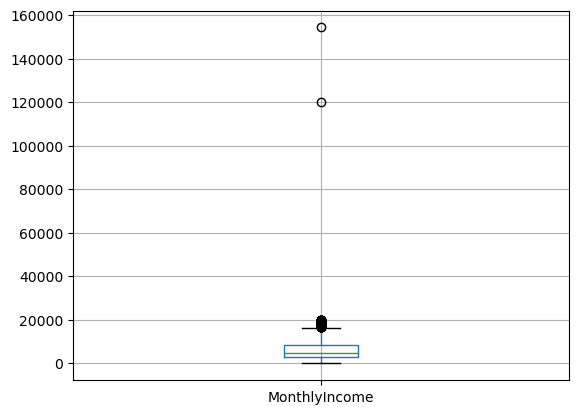

In [132]:
import matplotlib.pyplot as plt
master_data.boxplot(column=['MonthlyIncome'])
plt.show()

In [134]:
# To fin duplicates values
master_data.duplicated().sum()
duplicates_in_col = master_data[master_data.duplicated()]
duplicates_in_col

,EmpId,Attrition,Department_x,Age,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,StandardHours_x,...,PerformanceRating,StandardHours_y,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime
149,100145,No,Sales,32,9,2,Medical,Male,Divorced,200,...,3,200,9,2,4,8,7,0,7,No


In [135]:
# Specific value with duplicates values, in this case only ID: 100145.
dvalues = master_data[master_data["EmpId"].isin([100144, 100145,100146])]
dvalues

,EmpId,Attrition,Department_x,Age,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,StandardHours_x,...,PerformanceRating,StandardHours_y,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime
147,100144,No,Research & Development,30,18,3,Life Sciences,Female,Single,200,...,3,200,5,4,2,5,4,0,4,No
148,100145,No,Sales,32,9,2,Medical,Male,Divorced,200,...,3,200,9,2,4,8,7,0,7,No
149,100145,No,Sales,32,9,2,Medical,Male,Divorced,200,...,3,200,9,2,4,8,7,0,7,No
150,100146,No,Research & Development,30,5,3,Technical Degree,Female,Divorced,200,...,3,200,8,3,3,3,2,2,2,No


In [136]:
# To drop value that we will not use.
master_data = master_data.drop(index=148)


In [137]:
view = master_data[master_data["EmpId"].isin([100144, 100145,100146])]
view


,EmpId,Attrition,Department_x,Age,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,StandardHours_x,...,PerformanceRating,StandardHours_y,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime
147,100144,No,Research & Development,30,18,3,Life Sciences,Female,Single,200,...,3,200,5,4,2,5,4,0,4,No
149,100145,No,Sales,32,9,2,Medical,Male,Divorced,200,...,3,200,9,2,4,8,7,0,7,No
150,100146,No,Research & Development,30,5,3,Technical Degree,Female,Divorced,200,...,3,200,8,3,3,3,2,2,2,No


In [142]:
rows = master_data.iloc[[146,147,148,149]]
rows

,EmpId,Attrition,Department_x,Age,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,StandardHours_x,...,PerformanceRating,StandardHours_y,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime
146,100143,No,Research & Development,38,3,5,Technical Degree,Female,Single,200,...,4,200,19,2,3,3,2,2,2,Yes
147,100144,No,Research & Development,30,18,3,Life Sciences,Female,Single,200,...,3,200,5,4,2,5,4,0,4,No
149,100145,No,Sales,32,9,2,Medical,Male,Divorced,200,...,3,200,9,2,4,8,7,0,7,No
150,100146,No,Research & Development,30,5,3,Technical Degree,Female,Divorced,200,...,3,200,8,3,3,3,2,2,2,No


In [133]:
attrition_rate = (master_data['Attrition'].value_counts()['Yes'] / len(master_data)) * 100

print(f"Overall Attrition Rate: {attrition_rate:.2f}%")

Overall Attrition Rate: 16.12%


In [ ]:
# 2 PART OF THE PROJECT

In [144]:
# We will select the items which could give us a meaningful result using Whisker-Box Plot
'''
IN this case: 
Age, DistanceFromHome, HourlyRate, MonthlyIncome, TotalWorkingYears, NumCompaniesWorked, 
YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, TrainingTimesLastYear
'''

'\nIN this case: \nAge, DistanceFromHome, HourlyRate, MonthlyIncome, TotalWorkingYears, NumCompaniesWorked, \nYearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, TrainingTimesLastYear\n'

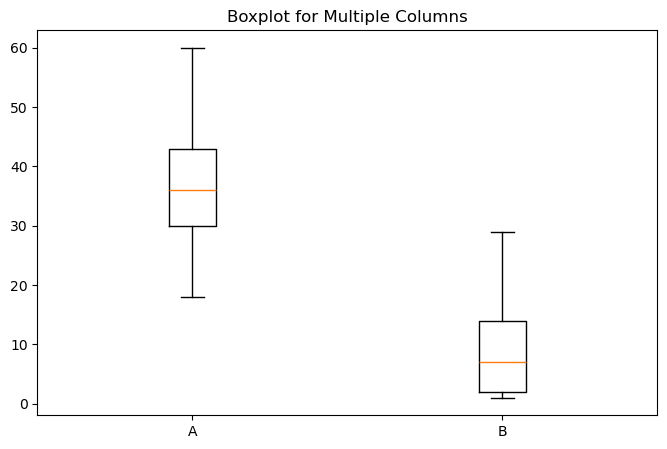

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot([master_data['Age'], master_data['DistanceFromHome']], labels=['A', 'B'])
plt.title('Boxplot for Multiple Columns')
plt.show()


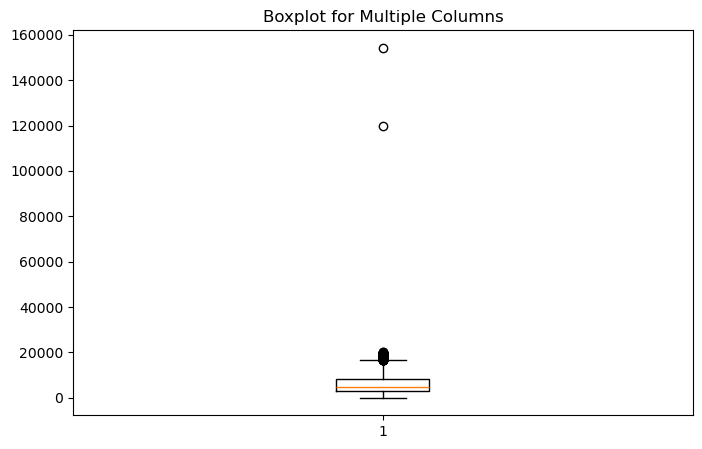

In [164]:
plt.figure(figsize=(8,5))
plt.boxplot(master_data['MonthlyIncome'])
plt.title('Boxplot for Multiple Columns')
plt.show()

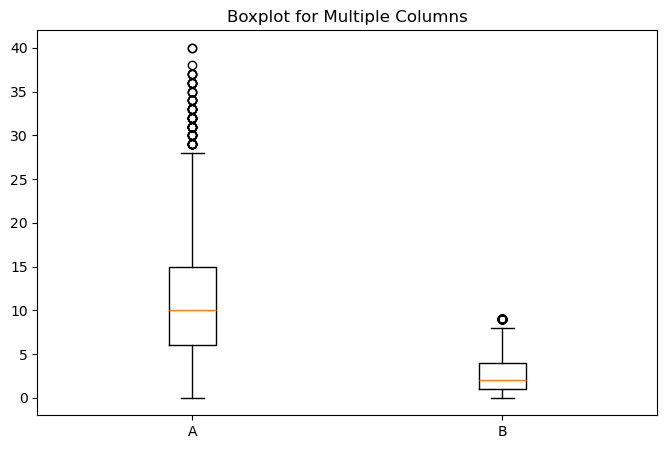

In [165]:
plt.figure(figsize=(8,5))
plt.boxplot([master_data['TotalWorkingYears'], master_data['NumCompaniesWorked']], labels=['A', 'B'])
plt.title('Boxplot for Multiple Columns')
plt.show()

In [ ]:
YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, TrainingTimesLastYear

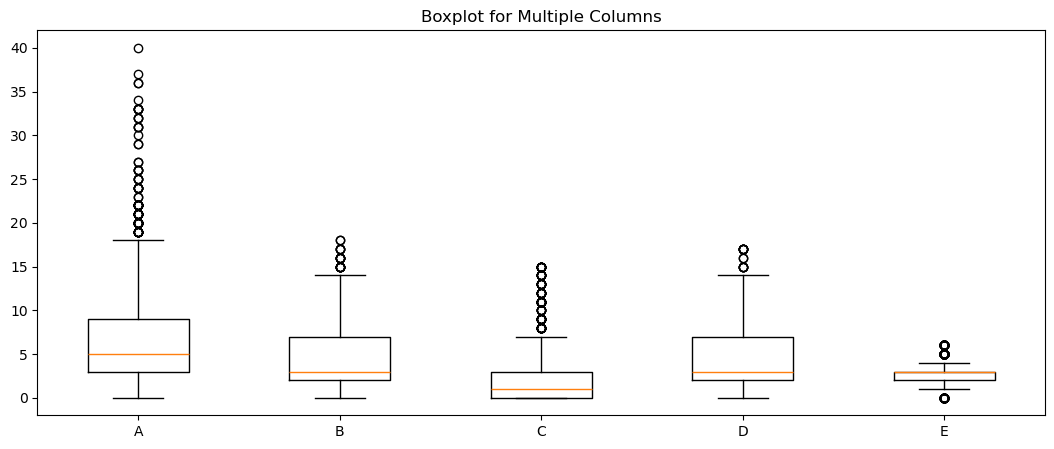

In [171]:
plt.figure(figsize=(13,5))
plt.boxplot([master_data['YearsAtCompany'], master_data['YearsInCurrentRole'], master_data['YearsSinceLastPromotion'],master_data['YearsWithCurrManager']
,master_data['TrainingTimesLastYear']], labels=['A', 'B','C','D','E'])
plt.title('Boxplot for Multiple Columns')
plt.show()

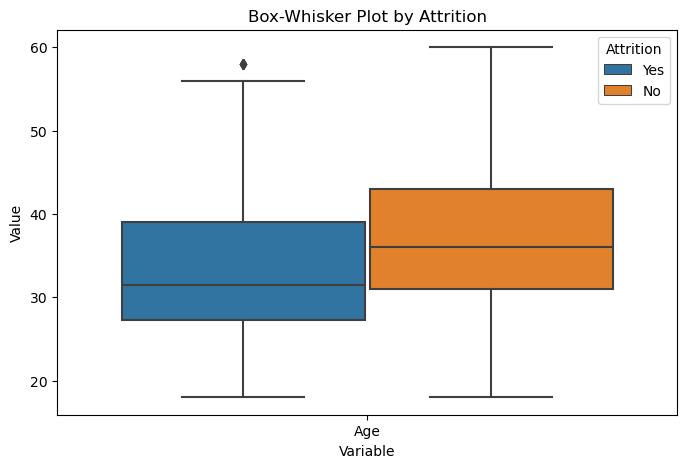

In [173]:
#Ahi parece que solo hemos chequeado outliers, pero ahora hay que buscar el boxplot group by attrition, consejo este quiza:

import seaborn as sns
import matplotlib.pyplot as plt

# Identify numeric columns
numeric_cols = ['Age']

# Melt dataframe for seaborn
df_melted = master_data.melt(id_vars='Attrition', value_vars=numeric_cols,
                    var_name='Variable', value_name='Value')

# Create boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='Variable', y='Value', hue='Attrition', data=df_melted)
plt.title('Box-Whisker Plot by Attrition')
plt.show()
